# Pospischil sPYr Example

### Install dependencies for ACT

In [ ]:
!pip install act-neuron

### Setup base directory and download cells

In [1]:
import sys

# Download the repository with all relevant model files if in google colab
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !rm -rf ./ACT
    !git clone https://github.com/V-Marco/ACT
    base_dir = "./ACT"
else:
    base_dir = "../.."

### Define a config file

These settings are modifiable by the user of ACT. Tune your own cells by altering values here.

In [2]:
import os

import numpy as np

pospischilsPYr = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/Pospischil/sPyr/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/Pospischil/sPyr/seg_modfiles"),
        "name": "sPYr",
    },
    "simulation_parameters": {
        "h_v_init": -67.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "g_pas", "low": 5.0e-06, "high": 2.0e-05},
            {"channel": "gnabar_hh2", "low": 2.5e-02, "high": 1.0e-01},
            {"channel": "gkbar_hh2", "low": 2.5e-03, "high": 1.0e-02},
            {"channel": "gkbar_im", "low": 1.5e-05, "high": 6.0e-05},
            {"channel": "gcabar_it", "low": 5.0e-04, "high": 2.0e-03},
        ],
        "target_V": None,  # Target voltages
        "target_params": [1e-5, 0.05, 0.005, 3e-5, 0.001],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        {
            "params": ["g_pas"],
            "voltage": [-100, -65],
            "time": [0, 500],
        },
        {
            "params": ["gnabar_hh2", "gkbar_hh2", "gkbar_im", "gcabar_it"],
            "voltage": [-65, 100],
            "time": [0, 2000],
        },
    ],
    "output": {"folder": "output_Pospischil_sPYr", "produce_plots": True},
    "run_mode": "segregated",  # "original", "segregated"
}

### Run the simulation

In [5]:
from act import simulator, analysis

simulator.run(pospischilsPYr)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
NEURON: The user defined name already exists: cad


/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special
INFO : Using neuron-nightly Package (Developer Version)

(2023-09-02 13:29:58.487603)-[START]
(2023-09-02 13:29:58.487650)-[INFO]: Number of amplitudes: 120


 near line 0
 objref hoc_obj_[2]
                   ^
        nrn_load_dll("./x86_64/....")


(2023-09-02 13:29:58.510636)-[INFO]: Mod files already loaded. Continuing.
Skipping analytical setting of passive properties, no cell passive_properties specified in config.


KeyboardInterrupt: 

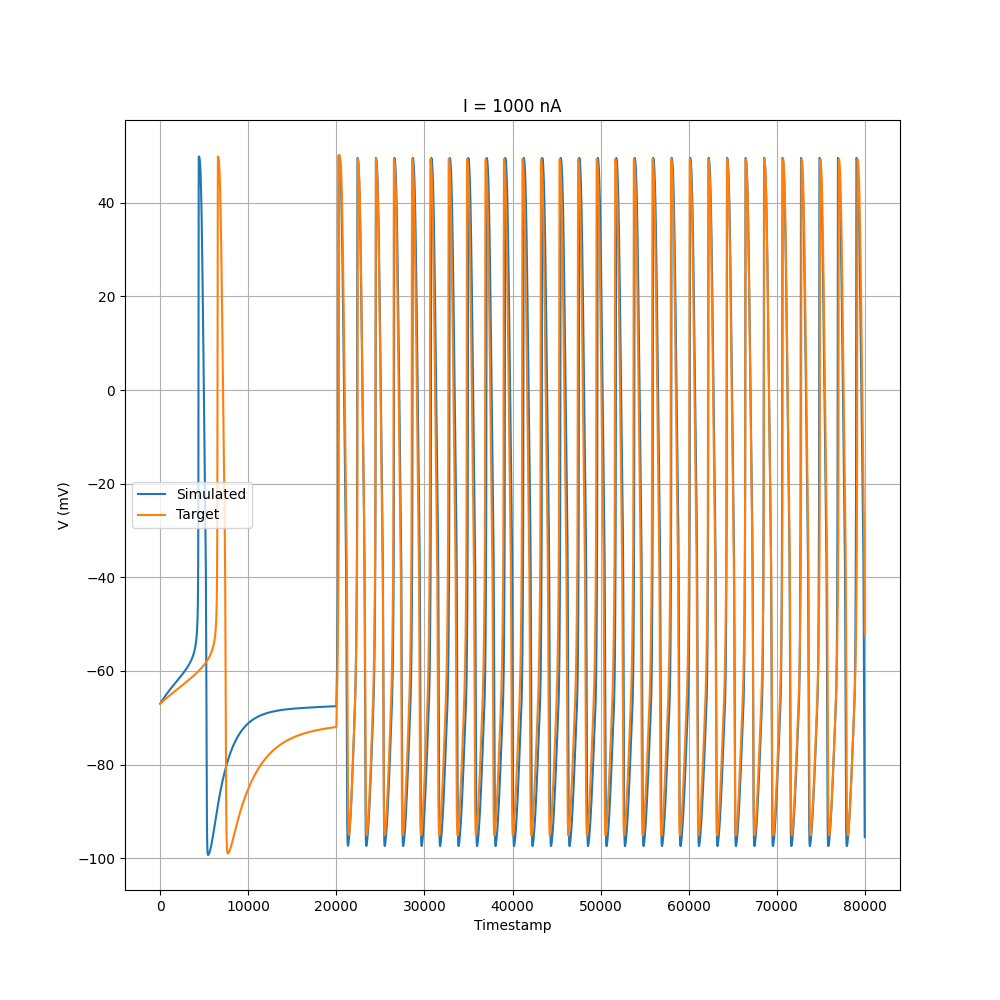

In [3]:
from IPython.display import Image

Image(filename="./output_Pospischil_sPYr/segregated/1000nA.png")

In [6]:
analysis.print_run_stats(pospischilsPYr)

output_Pospischil_sPYr : segregated
Med MSE: 3028.3525 (10557.1915)
Med Corr: 0.2198 (0.3277)
Pred MAE: 0.0112
----------



### Compare with the non-segregated approach

In [7]:
# Update our config to use the original mod files
pospischilsPYr["cell"]["modfiles_folder"] = os.path.join(
    base_dir, "data/Pospischil/sPyr/orig_modfiles"
)

# Change the run mode to original (instead of segregated)
pospischilsPYr["run_mode"] = "original"

# Re-run

simulator.run(pospischilsPYr)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
NEURON: The user defined name already exists: cad
 near line 0
 ^
        nrn_load_dll("./x86_64/....")


/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/IT_huguenard.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special
INFO : Using neuron-nightly Package (Developer Version)

(2023-09-02 13:30:10.443916)-[START]
(2023-09-02 13:30:10.443959)-[INFO]: Number of amplitudes: 120
(2023-09-02 13:30:10.449757)-[INFO]: Mod files already loaded. Continuing.
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-02 13:30:49.671491)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Skipping analyt

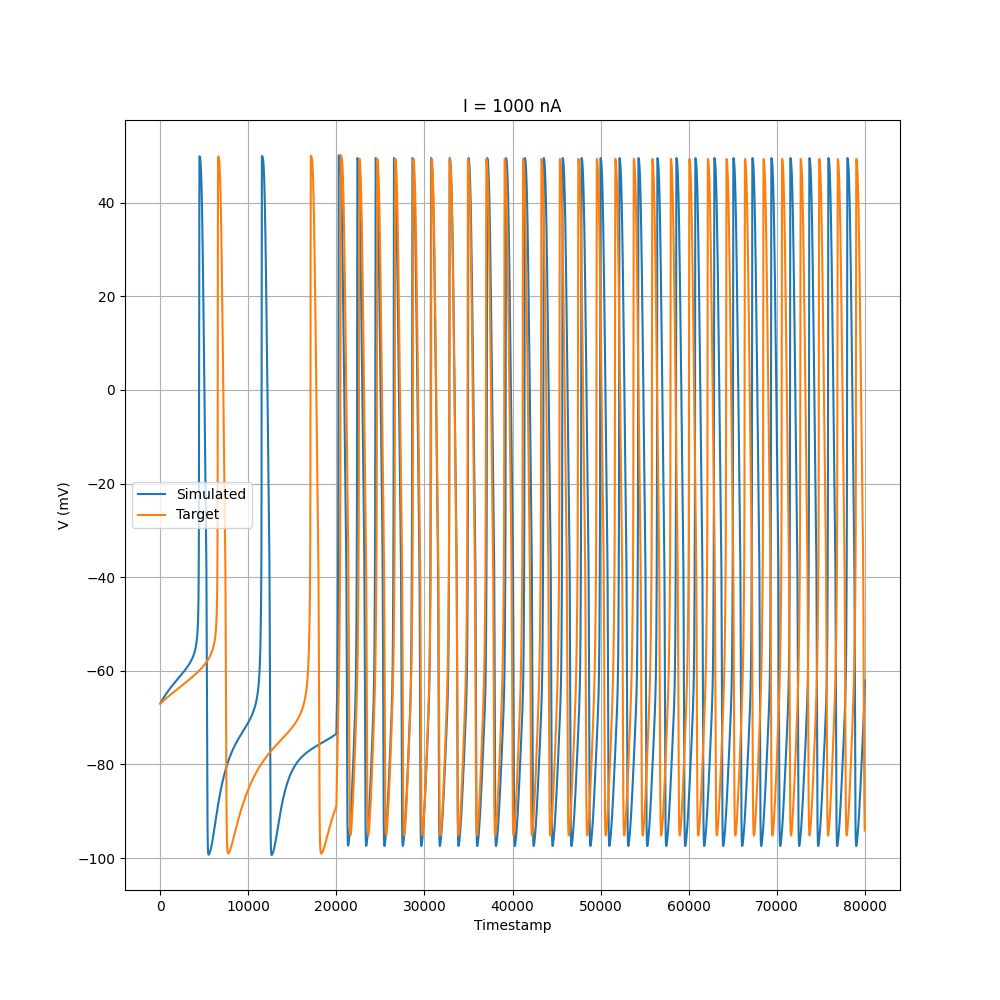

In [8]:
Image(filename="./output_Pospischil_sPYr/original/1000nA.png")

In [9]:
analysis.print_run_stats(pospischilsPYr)

output_Pospischil_sPYr : original
Med MSE: 3309.2128 (13616.2974)
Med Corr: 0.1895 (0.2897)
Pred MAE: 0.0112
----------

